In [4]:
import os
import re
import matplotlib.pyplot as plt

In [ ]:
!unzip outputs.zip

In [ ]:
# Function to extract speedup values from a single output file
def extract_speedup_from_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    # Use regular expressions to extract the speedup value
    speedup = float(re.search(r'Speed up: (\d+\.\d+)', content).group(1))

    return speedup

In [10]:
# Directories containing output files
output_directories = ['output_1', 'output_2', 'output_3']

# Values of N corresponding to the directories
Ns = [1000, 10**6, 10**8]

# Values of p (number of processes) to consider
processes = [1, 2, 3, 4, 5, 6, 7, 8, 12]

# Data storage for different N
data = {N: [] for N in Ns}

# Extract speedup values for each file
for directory, N in zip(output_directories, Ns):
    for p in processes:
        file_path = os.path.join(directory, f'out_{p}.txt')
        speedup = extract_speedup_from_file(file_path)
        data[N].append((p, speedup))


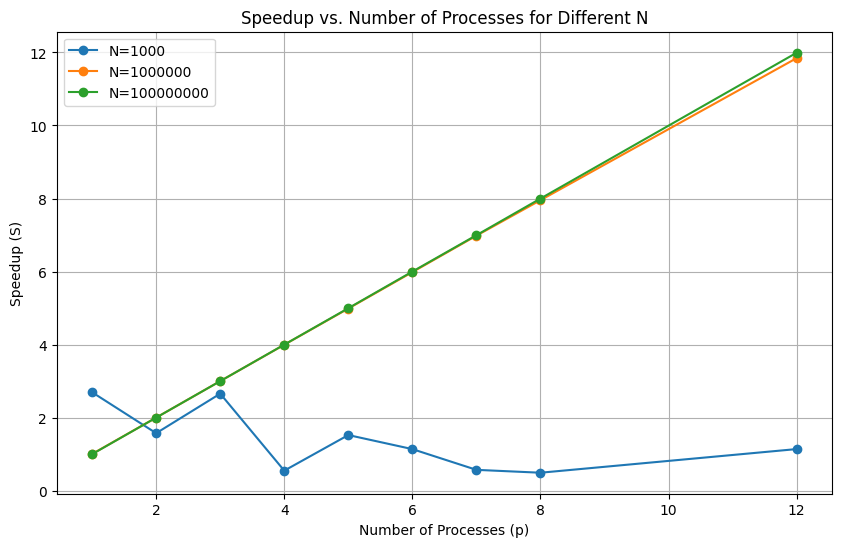

In [11]:
# Plotting
plt.figure(figsize=(10, 6))
for N in Ns:
    p_values, speedup_values = zip(*data[N])
    plt.plot(p_values, speedup_values, marker='o', label=f'N={N}')

plt.xlabel('Number of Processes (p)')
plt.ylabel('Speedup (S)')
plt.title('Speedup vs. Number of Processes for Different N')
plt.legend()
plt.grid(True)

plt.show()

In [12]:
import plotly.graph_objects as go

In [ ]:
# Create the Plotly figure with the dark theme template
fig = go.Figure()

for N in Ns:
    p_values, speedup_values = zip(*data[N])
    fig.add_trace(go.Scatter(x=p_values, y=speedup_values, mode='lines+markers', name=f'N={N}'))

# Set the template to use the dark theme
fig.update_layout(template="plotly_dark")

# Customize the layout
fig.update_layout(
    title='Speedup vs. Number of Processes for Different N',
    xaxis_title='Number of Processes (p)',
    yaxis_title='Speedup (S)',
    legend=dict(x=0, y=1),
    font=dict(color='white'),
)

# Show the plot
fig.show()